In [1]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold

In [2]:
# load data
data = pd.read_csv("Daily Flood data.csv",usecols=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
print(data.shape)
print(data.head())
print(data.describe())

(46046, 8)
   elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
0        0.0                        0.3               92.3   
1        0.0                        8.3               95.4   
2        0.0                       17.0               96.9   
3        0.0                        4.0               97.8   
4        0.0                        5.3              115.7   

   OneDayPriorRainfall  threedaysprior  sevendaysprior  tendaysprior  Flood  
0                  0.0             0.0            37.0          80.0      0  
1                  0.0             0.0            52.0          80.0      0  
2                  0.0            12.0            72.0          92.0      0  
3                  0.0             0.0            80.0         100.0      0  
4                 12.0            37.0            80.0         115.0      0  
          elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
count  46046.000000               45895.000000       46046.000000   
mean      

In [3]:
#missing values
null_values = data.isnull().sum()
print(null_values)

#missingvaluesImputation
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=['elevation','OneDayPriorRainfallOrigin',
                            'TenDayPriorOrigin', 'OneDayPriorRainfall', 'threedaysprior',
                            'sevendaysprior', 'tendaysprior', 'Flood'])
print(data.select_dtypes(include='number').nunique())
print(data.isnull().sum())
print(data.describe())

elevation                      0
OneDayPriorRainfallOrigin    151
TenDayPriorOrigin              0
OneDayPriorRainfall          571
threedaysprior                 0
sevendaysprior                 0
tendaysprior                   0
Flood                          0
dtype: int64
elevation                       5
OneDayPriorRainfallOrigin     887
TenDayPriorOrigin            2150
OneDayPriorRainfall          9359
threedaysprior               2502
sevendaysprior               3030
tendaysprior                 3778
Flood                           2
dtype: int64
elevation                    0
OneDayPriorRainfallOrigin    0
TenDayPriorOrigin            0
OneDayPriorRainfall          0
threedaysprior               0
sevendaysprior               0
tendaysprior                 0
Flood                        0
dtype: int64
          elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
count  46046.000000               46046.000000       46046.000000   
mean       0.393716                   0

(45070, 10)


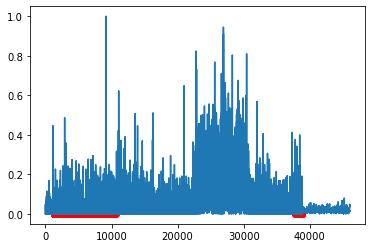

In [4]:
#movingaveragebasedoutlierremoval
# set window size
window_size = 7

# calculate moving average
data['moving_average'] = data['OneDayPriorRainfall'].rolling(window_size).mean()

# calculate z-score for each data point
data['z_score'] = (data['OneDayPriorRainfall'] - data['moving_average']) / data['OneDayPriorRainfall'].rolling(window_size).std()

# identify outliers
threshold = 3
outliers = data[data['z_score'].abs() > threshold]

data = data.drop(outliers.index)
print(data.shape)
# plot data and outliers
plt.plot(data['OneDayPriorRainfall'])
plt.scatter(outliers.index, outliers['OneDayPriorRainfall'], color='r')
plt.show()

(44437, 10)


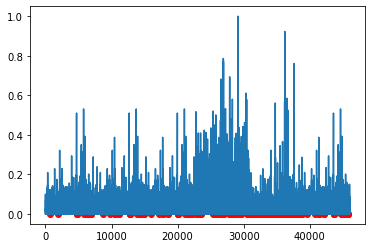

In [5]:
# calculate moving average
data['moving_average'] = data['OneDayPriorRainfallOrigin'].rolling(window_size).mean()

# calculate z-score for each data point
data['z_score'] = (data['OneDayPriorRainfallOrigin'] - data['moving_average']) / data['OneDayPriorRainfallOrigin'].rolling(window_size).std()

# identify outliers
threshold = 3
outliers = data[data['z_score'].abs() > threshold]

data = data.drop(outliers.index)
print(data.shape)
# plot data and outliers
plt.plot(data['OneDayPriorRainfallOrigin'])
plt.scatter(outliers.index, outliers['OneDayPriorRainfallOrigin'], color='r')
plt.show()

In [6]:
#imbalanceclasshanding
from imblearn.over_sampling import SMOTE
print(data.columns)
data = data.drop(['moving_average', 'z_score'], axis=1)
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data.drop('Flood', axis=1), data['Flood'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.3, random_state=32)
print(data.describe())

Index(['elevation', 'OneDayPriorRainfallOrigin', 'TenDayPriorOrigin',
       'OneDayPriorRainfall', 'threedaysprior', 'sevendaysprior',
       'tendaysprior', 'Flood', 'moving_average', 'z_score'],
      dtype='object')
          elevation  OneDayPriorRainfallOrigin  TenDayPriorOrigin  \
count  44437.000000               44437.000000       44437.000000   
mean       0.394815                   0.025605           0.083040   
std        0.407066                   0.042208           0.073744   
min        0.000000                   0.000000           0.000000   
25%        0.078837                   0.001284           0.025917   
50%        0.186047                   0.012199           0.068204   
75%        0.933488                   0.032745           0.121948   
max        1.000000                   1.000000           1.000000   

       OneDayPriorRainfall  threedaysprior  sevendaysprior  tendaysprior  \
count         44437.000000    44437.000000    44437.000000  44437.000000   
mean  

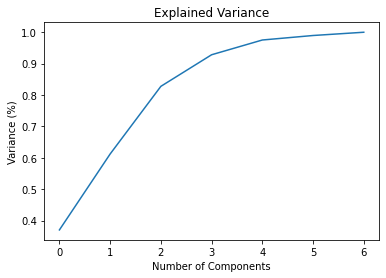

 sum of Explained variance 0.9896160178992129
(88660, 6)
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  2.09410704e-15  1.46191827e-15
   3.57517869e-16  2.98455989e-17  4.73672206e-17]
 [-0.00000000e+00 -2.09907217e-15  1.00000000e+00 -1.73182970e-15
   1.15139213e-16 -2.72820908e-16 -3.15211668e-16]
 [-0.00000000e+00 -1.61936190e-15  1.53003379e-15  1.00000000e+00
   8.64567513e-16  4.94964068e-16  4.04543193e-16]
 [ 0.00000000e+00 -3.70013722e-16 -7.98222933e-17 -8.57271884e-16
   1.00000000e+00  4.72686032e-16 -5.88275135e-16]
 [ 0.00000000e+00 -3.18558007e-16  3.63808061e-16 -8.13237844e-16
  -4.94462488e-16  1.00000000e+00  1.94008613e-15]]
[0.3700094  0.2420145  0.21559412 0.10064359 0.04700772 0.01434669]


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
scaling = StandardScaler()

Scaled_data = scaling.fit_transform(oversampled_X)
x = pd.DataFrame(Scaled_data)
# Set the n_components=3
principal = PCA()
principal.fit(x)
x = principal.transform(x)
plt.figure()
plt.plot(np.cumsum(principal.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.show()

principal = PCA(n_components=6)
principal.fit(x)
print(" sum of Explained variance",sum(principal.explained_variance_ratio_))
x = principal.transform(x)

# Check the dimensions of data after PCA
print(x.shape)

print(principal.components_)
print(principal.explained_variance_ratio_)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, oversampled_Y, test_size=0.3, random_state=32)

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = BaggingClassifier(n_estimators=16, random_state=22)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     13343
         1.0       0.97      1.00      0.98     13255

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



In [10]:
# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier(n_neighbors=5)))
    models.append(('cart', DecisionTreeClassifier(criterion="entropy", max_depth=None,
                                                  random_state=42)))
    models.append(('svm', SVC(kernel='linear', C=1)))
    models.append(('bayes', GaussianNB()))
    return models

In [11]:
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict(X_val)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X =np.hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

In [12]:
# # make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict(X_test)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = np.hstack(meta_X)
    # predict
    return blender.predict(meta_X)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# # split training set into train and validation sets
X_train_b, X_val, y_train_b, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# # create the base models
models = get_models()
# # train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# # make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# # evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score * 100))
print(classification_report(y_test, yhat))

Train: (62062, 6), Val: (20481, 6), Test: (26598, 6)
Blending Accuracy: 97.526
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     13343
         1.0       0.96      0.99      0.98     13255

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



In [14]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

kfold = model_selection.KFold(n_splits=10, random_state=43, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=None,
                                random_state=42)
estimators.append(('cart', model2))
model3 = SVC(kernel='linear', C=1)
estimators.append(('svm', model3))
model4 = GaussianNB()
estimators.append(('bayes', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.84      0.72     13343
         1.0       0.75      0.49      0.59     13255

    accuracy                           0.66     26598
   macro avg       0.69      0.66      0.65     26598
weighted avg       0.69      0.66      0.65     26598



In [15]:
stackingClassifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
resultstacking = stackingClassifier.fit(X_train, y_train).score(X_test, y_test)
print(resultstacking)
y_predict = stackingClassifier.predict(X_test)
print(classification_report(y_test, y_predict))

0.975261297841943
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     13343
         1.0       0.96      0.99      0.98     13255

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535, 0.9836829836829837]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535, 0.9836829836829837, 0.9845101135423716]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535, 0.9836829836829837, 0.9845101135423716, 0.9844349199187908]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535, 0.9836829836829837, 0.9845101135423716, 0.9844349199187908, 0.9845101135423716]
[2, 4, 6, 8, 10, 12, 14, 16] [0.9690578238965336, 0.9805624483043838, 0.9826302729528535, 0.9836829836829837, 0.9845101135423716, 0.9844349199187908, 0.9845101135423716, 0.9842469358598391]


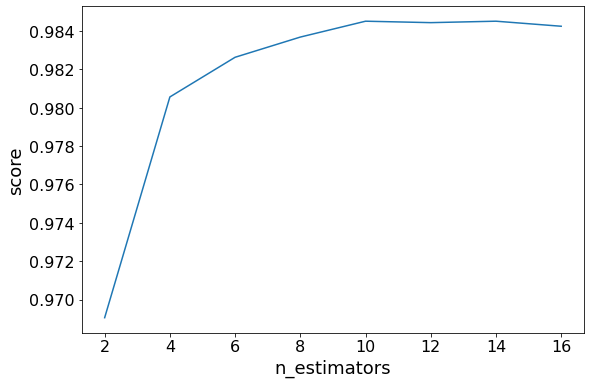

In [16]:
from sklearn.ensemble import BaggingClassifier
estimator_range = [2, 4, 6, 8, 10, 12, 14, 16]
models = []
scores = []

for n_estimators in estimator_range:
    # Create bagging classifier
    clf = BaggingClassifier(n_estimators=n_estimators, random_state=22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
    print(estimator_range,scores)
import matplotlib.pyplot as plt

# # Generate the plot of scores against number of estimators
plt.figure(figsize=(9, 6))
plt.plot(estimator_range, scores)
#
# # Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("score", fontsize=18)
plt.tick_params(labelsize=16)

# Visualize plot
plt.show()


In [17]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=16, random_state=22)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     13343
         1.0       0.97      1.00      0.98     13255

    accuracy                           0.98     26598
   macro avg       0.98      0.98      0.98     26598
weighted avg       0.98      0.98      0.98     26598



In [18]:
# Import models and utility functions
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Setting SEED for reproducibility
SEED = 1
# Splitting dataset
data= oversampled.drop(['OneDayPriorRainfall'], axis=1)
x=data.drop('Flood', axis=1)
y=data['Flood']
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingClassifier(n_estimators=200, max_depth=1, random_state=SEED)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.50      0.49      0.50     13343
         1.0       0.50      0.51      0.50     13255

    accuracy                           0.50     26598
   macro avg       0.50      0.50      0.50     26598
weighted avg       0.50      0.50      0.50     26598

